# Stage 1

## set up

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import json
import matplotlib.pyplot as plt
from tabulate import tabulate
import seaborn as sns
from collections import Counter
import plotly.graph_objects as go
import plotly.express as px

!pip install calmap
import calmap

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import os
for dirname, _, filenames in os.walk('/Users/<USERID>/Desktop/Data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## read from google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Primary Colors
colour_primary_black = '#000000'
colour_primary_purple = '#800080'

# Gradient Shades
colour_gradient_dark_purple = '#400040'
colour_gradient_medium_purple = '#600060'
colour_gradient_light_purple = '#A000A0'

# Accent Colors
colour_accent_lavender = '#E6E6FA'
colour_accent_deep_purple = '#4B0082'
colour_accent_soft_black = '#333333'

# Complementary Colors
colour_complementary_mint_green = '#98FF98'
colour_complementary_soft_pink = '#FFB6C1'

# Text
colour_off_white = '#b4abb8'

plt.rcParams['axes.titlecolor'] = colour_off_white
plt.rcParams['axes.labelcolor'] = colour_off_white
plt.rcParams['xtick.color'] = colour_off_white
plt.rcParams['ytick.color'] =colour_off_white
plt.rcParams['ytick.color'] = colour_off_white
plt.rcParams['ytick.color'] = colour_off_white
plt.rcParams['text.color'] = colour_off_white
plt.rcParams['legend.edgecolor'] = colour_primary_black



#background colour
plt.rcParams['axes.facecolor'] =colour_primary_black
plt.rcParams['figure.facecolor'] = colour_primary_black



#colour palette for heat maps
color_palette = sns.color_palette(palette = f'blend:{colour_primary_black},{colour_gradient_medium_purple}',as_cmap=True)

## CANADA

In [3]:
# manually open and read the JSON file
with open('/Users/<USERID>/Desktop/Data/1718/CA_category_id.json', 'r') as json_file:
    category_id = json.load(json_file)

##manually read in the csv file
videos = pd.read_csv('/Users/<USERID>/Desktop/Data/1718/CAvideos.csv')

###using category titles from json

json_df = pd.DataFrame(category_id['items'])
# Convert 'id' column to int64
json_df['id'] = json_df['id'].astype('int64')


# Extract 'title' from 'snippet' and assign it a name
json_df['category_title'] = json_df['snippet'].apply(lambda x: x['title'])

# Merge the DataFrames with the 'title' column
videos = videos.merge(json_df[['id', 'category_title']], left_on='category_id', right_on='id')

# Drop the 'id' column from the merged DataFrame
videos = videos.drop(columns=['id'])

##creating table to create bargraphs from

# Count occurrences of each unique value
value_counts = videos['category_title'].value_counts()

#summing the total views
category_views = videos.groupby(['category_title'],as_index=False)['views'].sum()

## summing up total comment_count
category_comment_count = videos.groupby(['category_title'],as_index=False)['comment_count'].sum()

##summing the total likes
category_likes = videos.groupby(['category_title'],as_index=False)['likes'].sum()
##summing the total likes
category_dislikes = videos.groupby(['category_title'],as_index=False)['dislikes'].sum()

# Sort the results
sorted_counts = value_counts.sort_values(ascending=False)
bargraph_data = pd.DataFrame({'category_title': sorted_counts.index, 'count': sorted_counts.values})
merged_df = bargraph_data.merge(category_views, on='category_title', how='left').merge(category_likes,on='category_title', how='left').merge(category_dislikes, on='category_title', how='left').merge(category_comment_count, on='category_title', how='left')

merged_df['%_of_total_views'] = ((merged_df['views']/merged_df['views'].sum()) * 100).round(2)
merged_df['%_of_total_likes'] = ((merged_df['likes']/merged_df['likes'].sum()) * 100).round(2)
merged_df['%_of_total_dislikes'] = ((merged_df['dislikes']/merged_df['dislikes'].sum()) * 100).round(2)
merged_df['%_of_total_comments'] = ((merged_df['comment_count']/merged_df['comment_count'].sum()) * 100).round(2)

column_sum = merged_df['count'].sum()
merged_df['%_of_videos'] = ((merged_df['count']/column_sum) * 100).round(2)


merged_df

,category_title,count,views,likes,dislikes,comment_count,%_of_total_views,%_of_total_likes,%_of_total_dislikes,%_of_total_comments,%_of_videos
0,Entertainment,13451,13671215509,387245433,25791583,55313036,29.23,24.08,32.32,27.26,32.96
1,News & Politics,4159,1614610043,32705054,3264041,9259788,3.45,2.03,4.09,4.56,10.19
2,People & Blogs,4105,3228227926,105388564,9480796,16818201,6.90,6.55,11.88,8.29,10.06
3,Comedy,3773,3708438785,196046674,5372515,19638776,7.93,12.19,6.73,9.68,9.25
4,Music,3731,13179850194,564447530,22098190,52435252,28.18,35.10,27.69,25.84,9.14
5,Sports,2787,2997652188,59449419,3286369,7661342,6.41,3.70,4.12,3.78,6.83
6,Film & Animation,2060,2939060844,77802003,3111259,10086573,6.28,4.84,3.90,4.97,5.05
7,Howto & Style,2007,1570846611,51183104,1730520,8342917,3.36,3.18,2.17,4.11,4.92
8,Gaming,1344,1241532385,51726552,2446882,9664887,2.65,3.22,3.07,4.76,3.29
9,Science & Technology,1155,1425090421,42814598,1791153,7209219,3.05,2.66,2.24,3.55,2.83


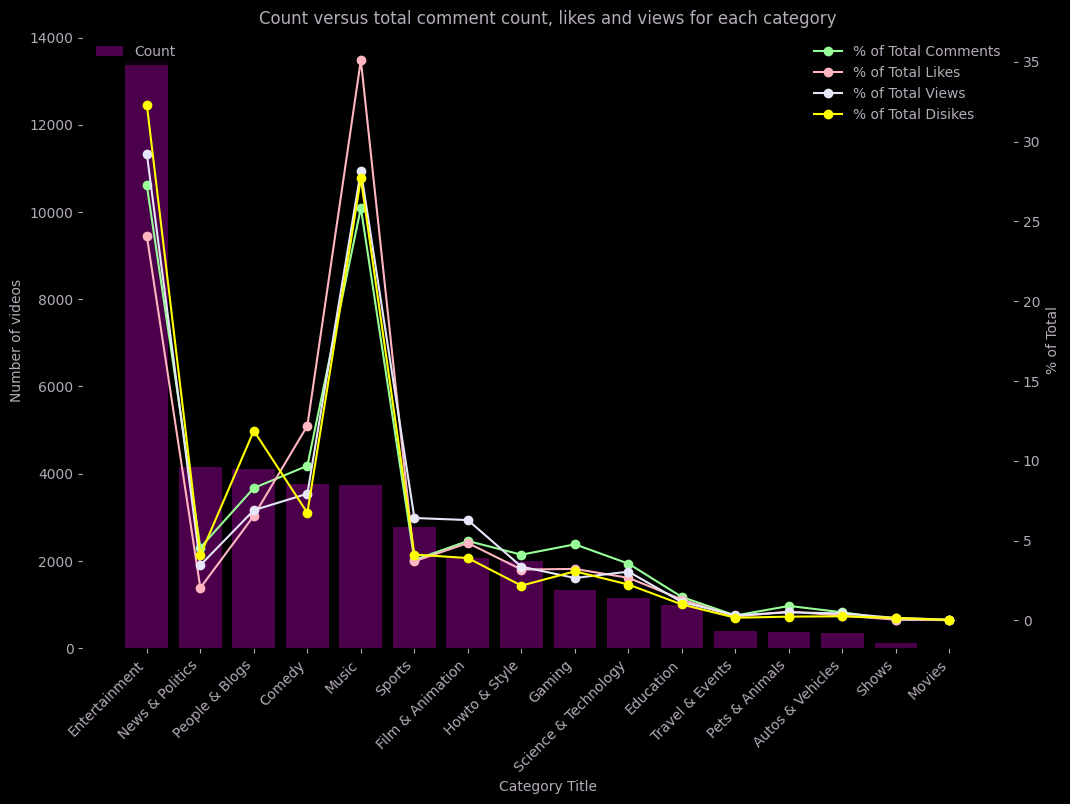

In [4]:
#Number of vids versus views

colour_bars = colour_primary_purple#'cornflowerblue' #'#9e9e9e' #'#8ab6d6'
colour_comments = colour_complementary_mint_green#'#6a5acd' # '#34a853'
colour_likes= colour_complementary_soft_pink#'#ff7f50' # '#fbbc05'
colour_views =colour_accent_lavender #'#20b2aa' # '#ea4335'
# Create the first set of bars (count)
fig, ax1 = plt.subplots(figsize=(12, 8))



# Plot the count data on the primary y-axis (left)
ax1.bar(merged_df['category_title'], merged_df['count'], color=colour_bars, alpha=0.6, label='Count')
ax1.set_xlabel('Category Title')
ax1.set_ylabel('Number of videos')
# Set the rotation for the x-axis labels before creating any bar plots
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()


# Plot the % of total comment count data on the secondary y-axis (right)
ax2.plot(merged_df['category_title'], merged_df['%_of_total_comments'], color=colour_comments, marker='o', label='% of Total Comments')

# Plot the likes data on the secondary y-axis (right)
ax2.plot(merged_df['category_title'], merged_df['%_of_total_likes'], color=colour_likes, marker='o', label='% of Total Likes')

# Plot the views data on the secondary y-axis (right)
ax2.plot(merged_df['category_title'], merged_df['%_of_total_views'], color=colour_views, marker='o', label='% of Total Views')

# Plot the dislikes data on the secondary y-axis (right)
ax2.plot(merged_df['category_title'], merged_df['%_of_total_dislikes'], color='yellow', marker='o', label='% of Total Disikes')

ax2.set_ylabel('% of Total')

# Since we've added more datasets to ax2, it's best to collect all the legend handles and labels, and then display them together.
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

# Add legend for all datasets
ax1.legend(handles1, labels1, loc='upper left')
ax2.legend(handles2, labels2, loc='upper right')

# Set a title for the graph
ax1.set_title('Count versus total comment count, likes and views for each category')

# Show the plot
plt.show()

In [5]:
videos['month_year'] = videos['trending_date'].apply(lambda x: f"{x[0:2]}-{x[6:]}")
month_year = videos.groupby(['month_year'],as_index=False)['category_title'].value_counts().reset_index().sort_index()
month_year = month_year.rename(columns={'category_title':'Category Title'})


# Pivot data to get category counts per month
pivot_df = month_year.pivot(index='month_year', columns='Category Title', values='count').fillna(0)

# Calculate percentage contribution of each category per month
pivot_df_percentage = pivot_df.divide(pivot_df.sum(axis=1), axis=0) * 100

# Melt the dataframe to long format for plotting with Plotly
df_melted = pivot_df_percentage.reset_index().melt(id_vars='month_year', value_name='percentage')


# Create an interactive filled line graph
fig = px.area(df_melted, x='month_year', y='percentage', color='Category Title',
              title='Percentage Contribution of Each Category Type per Month',
              labels={'month_year': 'Month of Year', 'percentage': 'Percentage Contribution'},
              hover_data=['Category Title', 'percentage'],
              line_shape='linear')

fig.update_layout(
    width=900, height=600, margin=dict(l=40, r=40, b=40, t=40),
    title_font_color = colour_off_white,
    xaxis_title_font_color = colour_off_white,
    yaxis=dict(showgrid=False),
    xaxis=dict(linecolor=colour_primary_black,showgrid=False),
    yaxis_title_font_color = colour_off_white,
    font_color= colour_off_white,
    plot_bgcolor=colour_primary_black,
    paper_bgcolor = colour_primary_black,
)

# Show the plot
fig.show()


## Germany

In [ ]:
# manually open and read the JSON file
with open('/Users/<USERID>/Desktop/Data/1718/DE_category_id.json', 'r') as json_file:
    category_id = json.load(json_file)

##manually read in the csv file
videos = pd.read_csv('/Users/<USERID>/Desktop/Data/1718/DEvideos.csv')

###using category titles from json

json_df = pd.DataFrame(category_id['items'])
# Convert 'id' column to int64
json_df['id'] = json_df['id'].astype('int64')


# Extract 'title' from 'snippet' and assign it a name
json_df['category_title'] = json_df['snippet'].apply(lambda x: x['title'])

# Merge the DataFrames with the 'title' column
videos = videos.merge(json_df[['id', 'category_title']], left_on='category_id', right_on='id')

# Drop the 'id' column from the merged DataFrame
videos = videos.drop(columns=['id'])

##creating table to create bargraphs from

# Count occurrences of each unique value
value_counts = videos['category_title'].value_counts()

#summing the total views
category_views = videos.groupby(['category_title'],as_index=False)['views'].sum()

## summing up total comment_count
category_comment_count = videos.groupby(['category_title'],as_index=False)['comment_count'].sum()

##summing the total likes
category_likes = videos.groupby(['category_title'],as_index=False)['likes'].sum()
##summing the total likes
category_dislikes = videos.groupby(['category_title'],as_index=False)['dislikes'].sum()

# Sort the results
sorted_counts = value_counts.sort_values(ascending=False)
bargraph_data = pd.DataFrame({'category_title': sorted_counts.index, 'count': sorted_counts.values})
merged_df = bargraph_data.merge(category_views, on='category_title', how='left').merge(category_likes,on='category_title', how='left').merge(category_dislikes, on='category_title', how='left').merge(category_comment_count, on='category_title', how='left')

merged_df['%_of_total_views'] = ((merged_df['views']/merged_df['views'].sum()) * 100).round(2)
merged_df['%_of_total_likes'] = ((merged_df['likes']/merged_df['likes'].sum()) * 100).round(2)
merged_df['%_of_total_dislikes'] = ((merged_df['dislikes']/merged_df['dislikes'].sum()) * 100).round(2)
merged_df['%_of_total_comments'] = ((merged_df['comment_count']/merged_df['comment_count'].sum()) * 100).round(2)

column_sum = merged_df['count'].sum()
merged_df['%_of_videos'] = ((merged_df['count']/column_sum) * 100).round(2)


merged_df

,category_title,count,views,likes,dislikes,comment_count,%_of_total_views,%_of_total_likes,%_of_total_dislikes,%_of_total_comments,%_of_videos
0,Entertainment,15292,8102638694,267752272,22485534,36487217,33.09,30.47,42.38,33.20,37.68
1,People & Blogs,5988,2193613268,60920058,4544157,8919200,8.96,6.93,8.57,8.12,14.75
2,News & Politics,2935,845937888,14391904,2369587,4096468,3.45,1.64,4.47,3.73,7.23
3,Sports,2752,1938192278,37646423,2153755,4220385,7.92,4.28,4.06,3.84,6.78
4,Comedy,2534,1642158154,74787405,2557861,8851969,6.71,8.51,4.82,8.06,6.24
5,Film & Animation,2376,1757184336,45315546,1864876,5387311,7.18,5.16,3.52,4.90,5.85
6,Music,2372,5683870646,300297066,12985188,29621836,23.21,34.17,24.48,26.96,5.84
7,Howto & Style,1745,589323375,15101881,739287,1783048,2.41,1.72,1.39,1.62,4.30
8,Gaming,1565,669356053,28868280,1984458,4703845,2.73,3.28,3.74,4.28,3.86
9,Autos & Vehicles,873,182112183,6143363,182704,657163,0.74,0.70,0.34,0.60,2.15


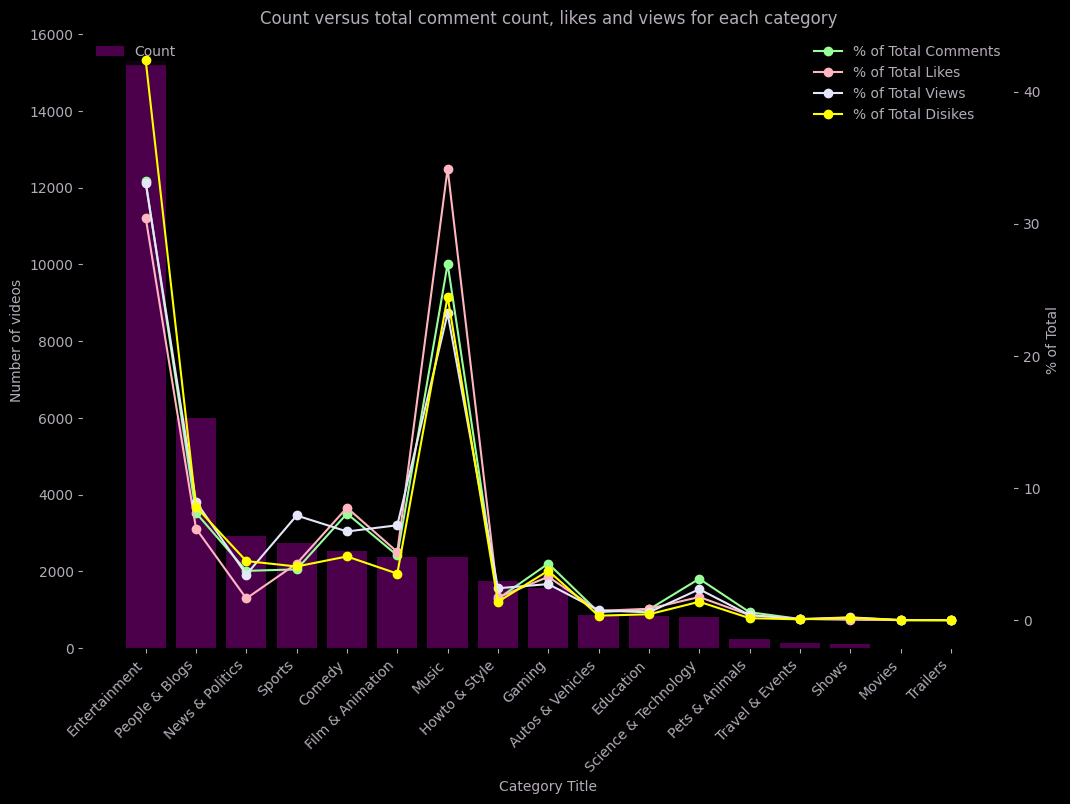

In [ ]:
#Number of vids versus views

colour_bars = colour_primary_purple#'cornflowerblue' #'#9e9e9e' #'#8ab6d6'
colour_comments = colour_complementary_mint_green#'#6a5acd' # '#34a853'
colour_likes= colour_complementary_soft_pink#'#ff7f50' # '#fbbc05'
colour_views =colour_accent_lavender #'#20b2aa' # '#ea4335'
# Create the first set of bars (count)
fig, ax1 = plt.subplots(figsize=(12, 8))



# Plot the count data on the primary y-axis (left)
ax1.bar(merged_df['category_title'], merged_df['count'], color=colour_bars, alpha=0.6, label='Count')
ax1.set_xlabel('Category Title')
ax1.set_ylabel('Number of videos')
# Set the rotation for the x-axis labels before creating any bar plots
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()


# Plot the % of total comment count data on the secondary y-axis (right)
ax2.plot(merged_df['category_title'], merged_df['%_of_total_comments'], color=colour_comments, marker='o', label='% of Total Comments')

# Plot the likes data on the secondary y-axis (right)
ax2.plot(merged_df['category_title'], merged_df['%_of_total_likes'], color=colour_likes, marker='o', label='% of Total Likes')

# Plot the views data on the secondary y-axis (right)
ax2.plot(merged_df['category_title'], merged_df['%_of_total_views'], color=colour_views, marker='o', label='% of Total Views')

# Plot the dislikes data on the secondary y-axis (right)
ax2.plot(merged_df['category_title'], merged_df['%_of_total_dislikes'], color='yellow', marker='o', label='% of Total Disikes')

ax2.set_ylabel('% of Total')

# Since we've added more datasets to ax2, it's best to collect all the legend handles and labels, and then display them together.
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

# Add legend for all datasets
ax1.legend(handles1, labels1, loc='upper left')
ax2.legend(handles2, labels2, loc='upper right')

# Set a title for the graph
ax1.set_title('Count versus total comment count, likes and views for each category')

# Show the plot
plt.show()

In [ ]:
videos['month_year'] = videos['trending_date'].apply(lambda x: f"{x[0:2]}-{x[6:]}")
month_year = videos.groupby(['month_year'],as_index=False)['category_title'].value_counts().reset_index().sort_index()
month_year = month_year.rename(columns={'category_title':'Category Title'})


# Pivot data to get category counts per month
pivot_df = month_year.pivot(index='month_year', columns='Category Title', values='count').fillna(0)

# Calculate percentage contribution of each category per month
pivot_df_percentage = pivot_df.divide(pivot_df.sum(axis=1), axis=0) * 100

# Melt the dataframe to long format for plotting with Plotly
df_melted = pivot_df_percentage.reset_index().melt(id_vars='month_year', value_name='percentage')


# Create an interactive filled line graph
fig = px.area(df_melted, x='month_year', y='percentage', color='Category Title',
              title='Percentage Contribution of Each Category Type per Month',
              labels={'month_year': 'Month of Year', 'percentage': 'Percentage Contribution'},
              hover_data=['Category Title', 'percentage'],
              line_shape='linear')

fig.update_layout(
    width=900, height=600, margin=dict(l=40, r=40, b=40, t=40),
    title_font_color = colour_off_white,
    xaxis_title_font_color = colour_off_white,
    yaxis=dict(showgrid=False),
    xaxis=dict(linecolor=colour_primary_black,showgrid=False),
    yaxis_title_font_color = colour_off_white,
    font_color= colour_off_white,
    plot_bgcolor=colour_primary_black,
    paper_bgcolor = colour_primary_black,
)

# Show the plot
fig.show()

## France

In [ ]:
# manually open and read the JSON file
with open('/Users/<USERID>/Desktop/Data/1718/FR_category_id.json', 'r') as json_file:
    category_id = json.load(json_file)

##manually read in the csv file
videos = pd.read_csv('/Users/<USERID>/Desktop/Data/1718/FRvideos.csv')

###using category titles from json

json_df = pd.DataFrame(category_id['items'])
# Convert 'id' column to int64
json_df['id'] = json_df['id'].astype('int64')


# Extract 'title' from 'snippet' and assign it a name
json_df['category_title'] = json_df['snippet'].apply(lambda x: x['title'])

# Merge the DataFrames with the 'title' column
videos = videos.merge(json_df[['id', 'category_title']], left_on='category_id', right_on='id')

# Drop the 'id' column from the merged DataFrame
videos = videos.drop(columns=['id'])

##creating table to create bargraphs from

# Count occurrences of each unique value
value_counts = videos['category_title'].value_counts()

#summing the total views
category_views = videos.groupby(['category_title'],as_index=False)['views'].sum()

## summing up total comment_count
category_comment_count = videos.groupby(['category_title'],as_index=False)['comment_count'].sum()

##summing the total likes
category_likes = videos.groupby(['category_title'],as_index=False)['likes'].sum()
##summing the total likes
category_dislikes = videos.groupby(['category_title'],as_index=False)['dislikes'].sum()

# Sort the results
sorted_counts = value_counts.sort_values(ascending=False)
bargraph_data = pd.DataFrame({'category_title': sorted_counts.index, 'count': sorted_counts.values})
merged_df = bargraph_data.merge(category_views, on='category_title', how='left').merge(category_likes,on='category_title', how='left').merge(category_dislikes, on='category_title', how='left').merge(category_comment_count, on='category_title', how='left')

merged_df['%_of_total_views'] = ((merged_df['views']/merged_df['views'].sum()) * 100).round(2)
merged_df['%_of_total_likes'] = ((merged_df['likes']/merged_df['likes'].sum()) * 100).round(2)
merged_df['%_of_total_dislikes'] = ((merged_df['dislikes']/merged_df['dislikes'].sum()) * 100).round(2)
merged_df['%_of_total_comments'] = ((merged_df['comment_count']/merged_df['comment_count'].sum()) * 100).round(2)

column_sum = merged_df['count'].sum()
merged_df['%_of_videos'] = ((merged_df['count']/column_sum) * 100).round(2)


merged_df

,category_title,count,views,likes,dislikes,comment_count,%_of_total_views,%_of_total_likes,%_of_total_dislikes,%_of_total_comments,%_of_videos
0,Entertainment,9819,3779500229,118243560,10351578,15729924,22.18,16.84,32.39,21.61,24.18
1,People & Blogs,5719,1280843533,28927705,1760711,4104818,7.52,4.12,5.51,5.64,14.08
2,Comedy,4343,1896284649,130805444,3391288,9136814,11.13,18.63,10.61,12.55,10.69
3,Sports,4342,1996811039,43964560,2145956,4575418,11.72,6.26,6.72,6.29,10.69
4,Music,3946,5026447522,277314234,9772318,25446289,29.50,39.49,30.58,34.97,9.72
5,News & Politics,3752,495045563,9301486,775868,1896101,2.90,1.32,2.43,2.61,9.24
6,Howto & Style,2361,468344413,15519633,643543,1759358,2.75,2.21,2.01,2.42,5.81
7,Film & Animation,2157,918517018,24631422,1092744,2841655,5.39,3.51,3.42,3.90,5.31
8,Gaming,1459,447160176,22502704,1097458,3047593,2.62,3.20,3.43,4.19,3.59
9,Science & Technology,802,461992294,18513625,511858,2926363,2.71,2.64,1.60,4.02,1.97


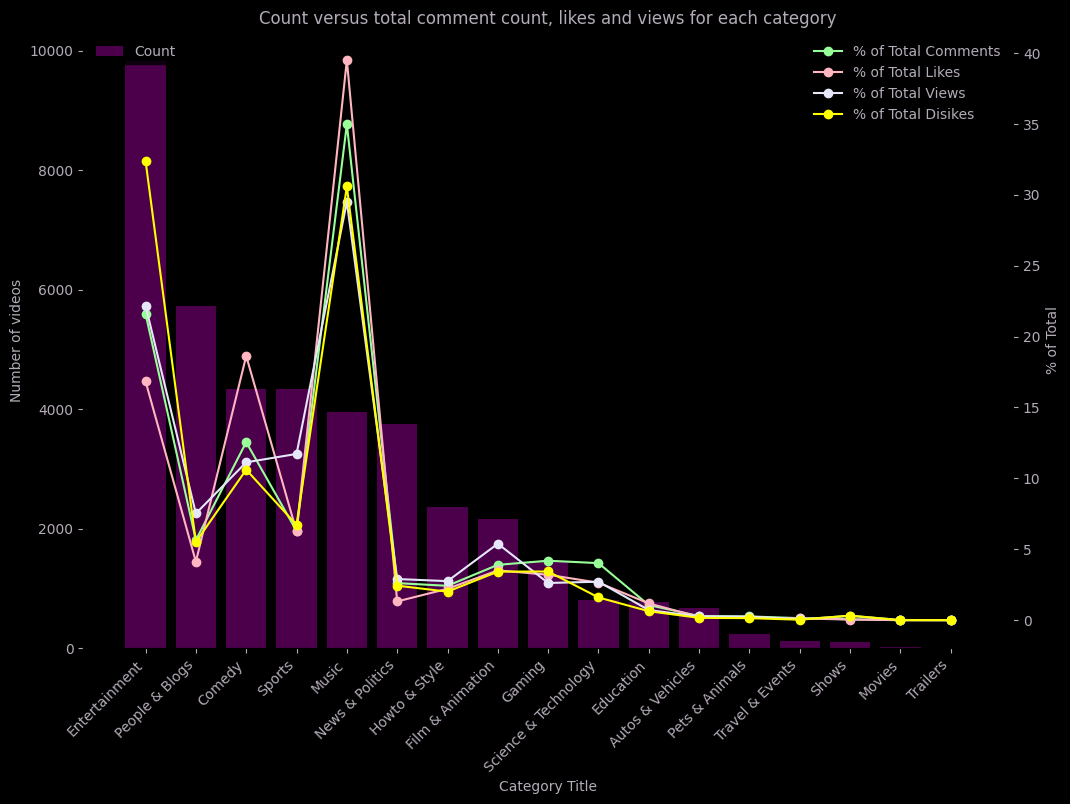

In [ ]:
#Number of vids versus views

colour_bars = colour_primary_purple#'cornflowerblue' #'#9e9e9e' #'#8ab6d6'
colour_comments = colour_complementary_mint_green#'#6a5acd' # '#34a853'
colour_likes= colour_complementary_soft_pink#'#ff7f50' # '#fbbc05'
colour_views =colour_accent_lavender #'#20b2aa' # '#ea4335'
# Create the first set of bars (count)
fig, ax1 = plt.subplots(figsize=(12, 8))



# Plot the count data on the primary y-axis (left)
ax1.bar(merged_df['category_title'], merged_df['count'], color=colour_bars, alpha=0.6, label='Count')
ax1.set_xlabel('Category Title')
ax1.set_ylabel('Number of videos')
# Set the rotation for the x-axis labels before creating any bar plots
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()


# Plot the % of total comment count data on the secondary y-axis (right)
ax2.plot(merged_df['category_title'], merged_df['%_of_total_comments'], color=colour_comments, marker='o', label='% of Total Comments')

# Plot the likes data on the secondary y-axis (right)
ax2.plot(merged_df['category_title'], merged_df['%_of_total_likes'], color=colour_likes, marker='o', label='% of Total Likes')

# Plot the views data on the secondary y-axis (right)
ax2.plot(merged_df['category_title'], merged_df['%_of_total_views'], color=colour_views, marker='o', label='% of Total Views')

# Plot the dislikes data on the secondary y-axis (right)
ax2.plot(merged_df['category_title'], merged_df['%_of_total_dislikes'], color='yellow', marker='o', label='% of Total Disikes')

ax2.set_ylabel('% of Total')

# Since we've added more datasets to ax2, it's best to collect all the legend handles and labels, and then display them together.
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

# Add legend for all datasets
ax1.legend(handles1, labels1, loc='upper left')
ax2.legend(handles2, labels2, loc='upper right')

# Set a title for the graph
ax1.set_title('Count versus total comment count, likes and views for each category')

# Show the plot
plt.show()

In [ ]:
videos['month_year'] = videos['trending_date'].apply(lambda x: f"{x[0:2]}-{x[6:]}")
month_year = videos.groupby(['month_year'],as_index=False)['category_title'].value_counts().reset_index().sort_index()
month_year = month_year.rename(columns={'category_title':'Category Title'})


# Pivot data to get category counts per month
pivot_df = month_year.pivot(index='month_year', columns='Category Title', values='count').fillna(0)

# Calculate percentage contribution of each category per month
pivot_df_percentage = pivot_df.divide(pivot_df.sum(axis=1), axis=0) * 100

# Melt the dataframe to long format for plotting with Plotly
df_melted = pivot_df_percentage.reset_index().melt(id_vars='month_year', value_name='percentage')


# Create an interactive filled line graph
fig = px.area(df_melted, x='month_year', y='percentage', color='Category Title',
              title='Percentage Contribution of Each Category Type per Month',
              labels={'month_year': 'Month of Year', 'percentage': 'Percentage Contribution'},
              hover_data=['Category Title', 'percentage'],
              line_shape='linear')

fig.update_layout(
    width=900, height=600, margin=dict(l=40, r=40, b=40, t=40),
    title_font_color = colour_off_white,
    xaxis_title_font_color = colour_off_white,
    yaxis=dict(showgrid=False),
    xaxis=dict(linecolor=colour_primary_black,showgrid=False),
    yaxis_title_font_color = colour_off_white,
    font_color= colour_off_white,
    plot_bgcolor=colour_primary_black,
    paper_bgcolor = colour_primary_black,
)

# Show the plot
fig.show()


## Great Britain

In [ ]:
# manually open and read the JSON file
with open('/Users/<USERID>/Desktop/Data/1718/GB_category_id.json', 'r') as json_file:
    category_id = json.load(json_file)

##manually read in the csv file
videos = pd.read_csv('/Users/<USERID>/Desktop/Data/1718/GBvideos.csv')

###using category titles from json

json_df = pd.DataFrame(category_id['items'])
# Convert 'id' column to int64
json_df['id'] = json_df['id'].astype('int64')


# Extract 'title' from 'snippet' and assign it a name
json_df['category_title'] = json_df['snippet'].apply(lambda x: x['title'])

# Merge the DataFrames with the 'title' column
videos = videos.merge(json_df[['id', 'category_title']], left_on='category_id', right_on='id')

# Drop the 'id' column from the merged DataFrame
videos = videos.drop(columns=['id'])

##creating table to create bargraphs from

# Count occurrences of each unique value
value_counts = videos['category_title'].value_counts()

#summing the total views
category_views = videos.groupby(['category_title'],as_index=False)['views'].sum()

## summing up total comment_count
category_comment_count = videos.groupby(['category_title'],as_index=False)['comment_count'].sum()

##summing the total likes
category_likes = videos.groupby(['category_title'],as_index=False)['likes'].sum()
##summing the total likes
category_dislikes = videos.groupby(['category_title'],as_index=False)['dislikes'].sum()

# Sort the results
sorted_counts = value_counts.sort_values(ascending=False)
bargraph_data = pd.DataFrame({'category_title': sorted_counts.index, 'count': sorted_counts.values})
merged_df = bargraph_data.merge(category_views, on='category_title', how='left').merge(category_likes,on='category_title', how='left').merge(category_dislikes, on='category_title', how='left').merge(category_comment_count, on='category_title', how='left')

merged_df['%_of_total_views'] = ((merged_df['views']/merged_df['views'].sum()) * 100).round(2)
merged_df['%_of_total_likes'] = ((merged_df['likes']/merged_df['likes'].sum()) * 100).round(2)
merged_df['%_of_total_dislikes'] = ((merged_df['dislikes']/merged_df['dislikes'].sum()) * 100).round(2)
merged_df['%_of_total_comments'] = ((merged_df['comment_count']/merged_df['comment_count'].sum()) * 100).round(2)

column_sum = merged_df['count'].sum()
merged_df['%_of_videos'] = ((merged_df['count']/column_sum) * 100).round(2)


merged_df

,category_title,count,views,likes,dislikes,comment_count,%_of_total_views,%_of_total_likes,%_of_total_dislikes,%_of_total_comments,%_of_videos
0,Music,13754,171160864769,3742993052,159370236,293013140,74.51,71.84,54.80,58.41,35.42
1,Entertainment,9124,29786283041,744266231,88106151,116897440,12.97,14.28,30.30,23.30,23.50
2,People & Blogs,2926,5754287829,135396249,12002570,18713149,2.50,2.60,4.13,3.73,7.54
3,Film & Animation,2577,8362707626,147418633,6192934,15590011,3.64,2.83,2.13,3.11,6.64
4,Howto & Style,1928,1190155227,51360345,1607193,7356296,0.52,0.99,0.55,1.47,4.97
5,Sports,1907,3341736194,74888487,9914555,10056226,1.45,1.44,3.41,2.00,4.91
6,Comedy,1828,3962062143,143372176,4630521,16718816,1.72,2.75,1.59,3.33,4.71
7,Gaming,1788,1746619532,70125588,2304458,6166994,0.76,1.35,0.79,1.23,4.61
8,News & Politics,1225,1409131375,30651565,3780349,9386604,0.61,0.59,1.30,1.87,3.16
9,Pets & Animals,534,541320573,15288374,366060,1404698,0.24,0.29,0.13,0.28,1.38


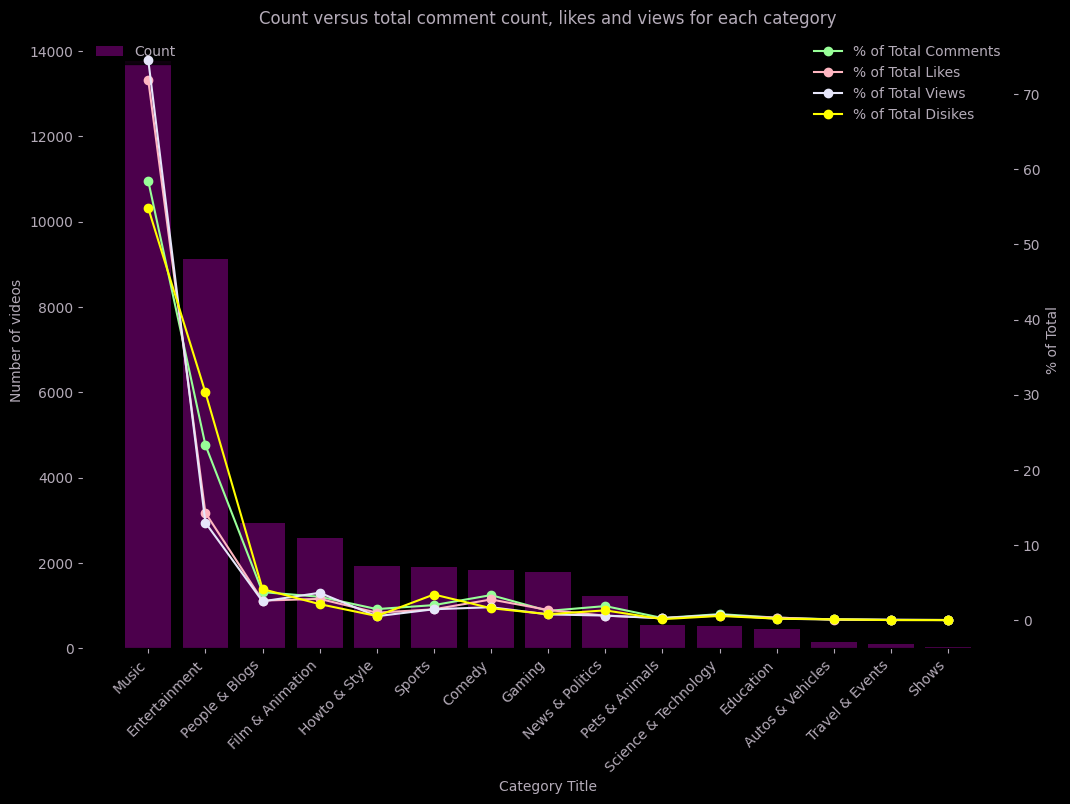

In [ ]:
#Number of vids versus views

colour_bars = colour_primary_purple#'cornflowerblue' #'#9e9e9e' #'#8ab6d6'
colour_comments = colour_complementary_mint_green#'#6a5acd' # '#34a853'
colour_likes= colour_complementary_soft_pink#'#ff7f50' # '#fbbc05'
colour_views =colour_accent_lavender #'#20b2aa' # '#ea4335'
# Create the first set of bars (count)
fig, ax1 = plt.subplots(figsize=(12, 8))



# Plot the count data on the primary y-axis (left)
ax1.bar(merged_df['category_title'], merged_df['count'], color=colour_bars, alpha=0.6, label='Count')
ax1.set_xlabel('Category Title')
ax1.set_ylabel('Number of videos')
# Set the rotation for the x-axis labels before creating any bar plots
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()


# Plot the % of total comment count data on the secondary y-axis (right)
ax2.plot(merged_df['category_title'], merged_df['%_of_total_comments'], color=colour_comments, marker='o', label='% of Total Comments')

# Plot the likes data on the secondary y-axis (right)
ax2.plot(merged_df['category_title'], merged_df['%_of_total_likes'], color=colour_likes, marker='o', label='% of Total Likes')

# Plot the views data on the secondary y-axis (right)
ax2.plot(merged_df['category_title'], merged_df['%_of_total_views'], color=colour_views, marker='o', label='% of Total Views')

# Plot the dislikes data on the secondary y-axis (right)
ax2.plot(merged_df['category_title'], merged_df['%_of_total_dislikes'], color='yellow', marker='o', label='% of Total Disikes')

ax2.set_ylabel('% of Total')

# Since we've added more datasets to ax2, it's best to collect all the legend handles and labels, and then display them together.
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

# Add legend for all datasets
ax1.legend(handles1, labels1, loc='upper left')
ax2.legend(handles2, labels2, loc='upper right')

# Set a title for the graph
ax1.set_title('Count versus total comment count, likes and views for each category')

# Show the plot
plt.show()

In [ ]:
videos['month_year'] = videos['trending_date'].apply(lambda x: f"{x[0:2]}-{x[6:]}")
month_year = videos.groupby(['month_year'],as_index=False)['category_title'].value_counts().reset_index().sort_index()
month_year = month_year.rename(columns={'category_title':'Category Title'})


# Pivot data to get category counts per month
pivot_df = month_year.pivot(index='month_year', columns='Category Title', values='count').fillna(0)

# Calculate percentage contribution of each category per month
pivot_df_percentage = pivot_df.divide(pivot_df.sum(axis=1), axis=0) * 100

# Melt the dataframe to long format for plotting with Plotly
df_melted = pivot_df_percentage.reset_index().melt(id_vars='month_year', value_name='percentage')


# Create an interactive filled line graph
fig = px.area(df_melted, x='month_year', y='percentage', color='Category Title',
              title='Percentage Contribution of Each Category Type per Month',
              labels={'month_year': 'Month of Year', 'percentage': 'Percentage Contribution'},
              hover_data=['Category Title', 'percentage'],
              line_shape='linear')

fig.update_layout(
    width=900, height=600, margin=dict(l=40, r=40, b=40, t=40),
    title_font_color = colour_off_white,
    xaxis_title_font_color = colour_off_white,
    yaxis=dict(showgrid=False),
    xaxis=dict(linecolor=colour_primary_black,showgrid=False),
    yaxis_title_font_color = colour_off_white,
    font_color= colour_off_white,
    plot_bgcolor=colour_primary_black,
    paper_bgcolor = colour_primary_black,
)

# Show the plot
fig.show()


## India

In [ ]:
# manually open and read the JSON file
with open('/Users/<USERID>/Desktop/Data/1718/IN_category_id.json', 'r') as json_file:
    category_id = json.load(json_file)

##manually read in the csv file
videos = pd.read_csv('/Users/<USERID>/Desktop/Data/1718/INvideos.csv')

###using category titles from json

json_df = pd.DataFrame(category_id['items'])
# Convert 'id' column to int64
json_df['id'] = json_df['id'].astype('int64')


# Extract 'title' from 'snippet' and assign it a name
json_df['category_title'] = json_df['snippet'].apply(lambda x: x['title'])

# Merge the DataFrames with the 'title' column
videos = videos.merge(json_df[['id', 'category_title']], left_on='category_id', right_on='id')

# Drop the 'id' column from the merged DataFrame
videos = videos.drop(columns=['id'])

##creating table to create bargraphs from

# Count occurrences of each unique value
value_counts = videos['category_title'].value_counts()

#summing the total views
category_views = videos.groupby(['category_title'],as_index=False)['views'].sum()

## summing up total comment_count
category_comment_count = videos.groupby(['category_title'],as_index=False)['comment_count'].sum()

##summing the total likes
category_likes = videos.groupby(['category_title'],as_index=False)['likes'].sum()
##summing the total likes
category_dislikes = videos.groupby(['category_title'],as_index=False)['dislikes'].sum()

# Sort the results
sorted_counts = value_counts.sort_values(ascending=False)
bargraph_data = pd.DataFrame({'category_title': sorted_counts.index, 'count': sorted_counts.values})
merged_df = bargraph_data.merge(category_views, on='category_title', how='left').merge(category_likes,on='category_title', how='left').merge(category_dislikes, on='category_title', how='left').merge(category_comment_count, on='category_title', how='left')

merged_df['%_of_total_views'] = ((merged_df['views']/merged_df['views'].sum()) * 100).round(2)
merged_df['%_of_total_likes'] = ((merged_df['likes']/merged_df['likes'].sum()) * 100).round(2)
merged_df['%_of_total_dislikes'] = ((merged_df['dislikes']/merged_df['dislikes'].sum()) * 100).round(2)
merged_df['%_of_total_comments'] = ((merged_df['comment_count']/merged_df['comment_count'].sum()) * 100).round(2)

column_sum = merged_df['count'].sum()
merged_df['%_of_videos'] = ((merged_df['count']/column_sum) * 100).round(2)


merged_df

,category_title,count,views,likes,dislikes,comment_count,%_of_total_views,%_of_total_likes,%_of_total_dislikes,%_of_total_comments,%_of_videos
0,Entertainment,16712,16120390974,396146637,27428929,42199473,40.70,39.17,44.11,42.21,44.87
1,News & Politics,5241,1994263812,15545971,2737604,2954198,5.04,1.54,4.40,2.95,14.07
2,Music,3858,10150844485,254328536,15030992,17595070,25.63,25.15,24.17,17.60,10.36
3,Comedy,3429,2887672070,174114686,6976508,13806968,7.29,17.22,11.22,13.81,9.21
4,People & Blogs,2624,1364104242,23194729,1728388,2661920,3.44,2.29,2.78,2.66,7.04
5,Film & Animation,1658,3847149504,69241553,4315081,5789446,9.71,6.85,6.94,5.79,4.45
6,Education,1227,145533791,7471726,246667,943667,0.37,0.74,0.40,0.94,3.29
7,Howto & Style,845,737343593,7889210,859807,748899,1.86,0.78,1.38,0.75,2.27
8,Sports,731,1379949159,32969986,1316379,2717679,3.48,3.26,2.12,2.72,1.96
9,Science & Technology,552,477111016,21395585,913603,9664392,1.20,2.12,1.47,9.67,1.48


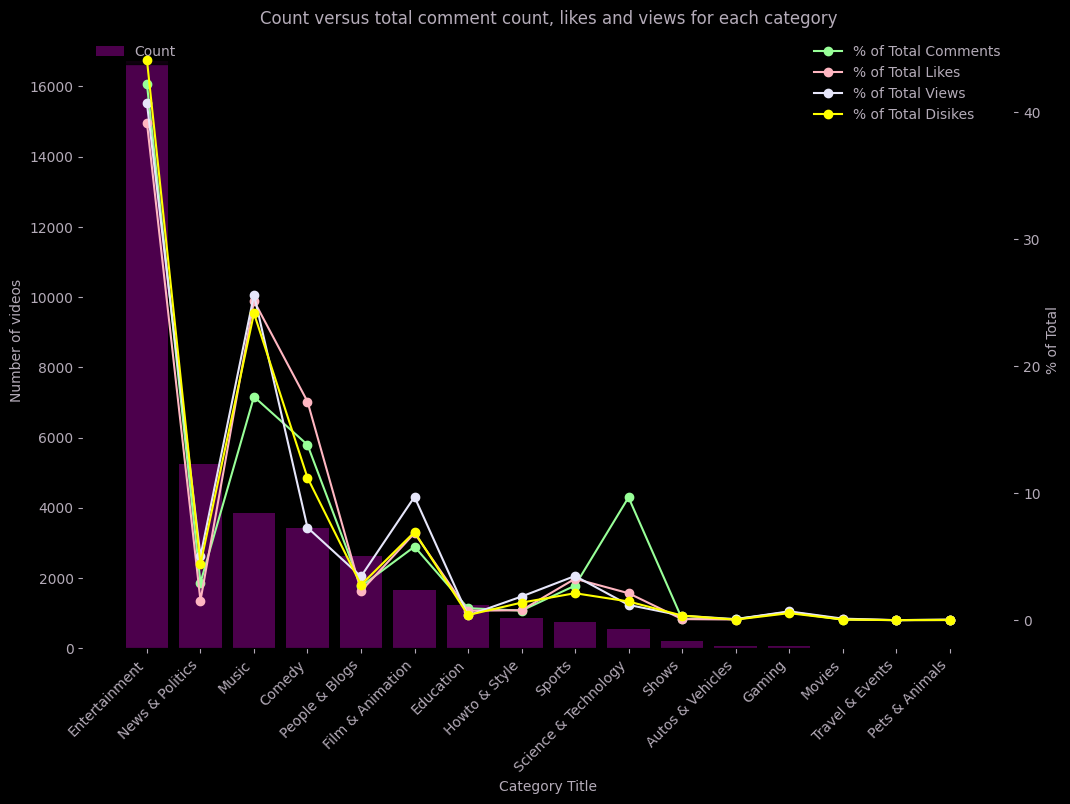

In [ ]:
#Number of vids versus views

colour_bars = colour_primary_purple#'cornflowerblue' #'#9e9e9e' #'#8ab6d6'
colour_comments = colour_complementary_mint_green#'#6a5acd' # '#34a853'
colour_likes= colour_complementary_soft_pink#'#ff7f50' # '#fbbc05'
colour_views =colour_accent_lavender #'#20b2aa' # '#ea4335'
# Create the first set of bars (count)
fig, ax1 = plt.subplots(figsize=(12, 8))



# Plot the count data on the primary y-axis (left)
ax1.bar(merged_df['category_title'], merged_df['count'], color=colour_bars, alpha=0.6, label='Count')
ax1.set_xlabel('Category Title')
ax1.set_ylabel('Number of videos')
# Set the rotation for the x-axis labels before creating any bar plots
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()


# Plot the % of total comment count data on the secondary y-axis (right)
ax2.plot(merged_df['category_title'], merged_df['%_of_total_comments'], color=colour_comments, marker='o', label='% of Total Comments')

# Plot the likes data on the secondary y-axis (right)
ax2.plot(merged_df['category_title'], merged_df['%_of_total_likes'], color=colour_likes, marker='o', label='% of Total Likes')

# Plot the views data on the secondary y-axis (right)
ax2.plot(merged_df['category_title'], merged_df['%_of_total_views'], color=colour_views, marker='o', label='% of Total Views')

# Plot the dislikes data on the secondary y-axis (right)
ax2.plot(merged_df['category_title'], merged_df['%_of_total_dislikes'], color='yellow', marker='o', label='% of Total Disikes')

ax2.set_ylabel('% of Total')

# Since we've added more datasets to ax2, it's best to collect all the legend handles and labels, and then display them together.
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

# Add legend for all datasets
ax1.legend(handles1, labels1, loc='upper left')
ax2.legend(handles2, labels2, loc='upper right')

# Set a title for the graph
ax1.set_title('Count versus total comment count, likes and views for each category')

# Show the plot
plt.show()

In [ ]:
videos['month_year'] = videos['trending_date'].apply(lambda x: f"{x[0:2]}-{x[6:]}")
month_year = videos.groupby(['month_year'],as_index=False)['category_title'].value_counts().reset_index().sort_index()
month_year = month_year.rename(columns={'category_title':'Category Title'})


# Pivot data to get category counts per month
pivot_df = month_year.pivot(index='month_year', columns='Category Title', values='count').fillna(0)

# Calculate percentage contribution of each category per month
pivot_df_percentage = pivot_df.divide(pivot_df.sum(axis=1), axis=0) * 100

# Melt the dataframe to long format for plotting with Plotly
df_melted = pivot_df_percentage.reset_index().melt(id_vars='month_year', value_name='percentage')


# Create an interactive filled line graph
fig = px.area(df_melted, x='month_year', y='percentage', color='Category Title',
              title='Percentage Contribution of Each Category Type per Month',
              labels={'month_year': 'Month of Year', 'percentage': 'Percentage Contribution'},
              hover_data=['Category Title', 'percentage'],
              line_shape='linear')

fig.update_layout(
    width=900, height=600, margin=dict(l=40, r=40, b=40, t=40),
    title_font_color = colour_off_white,
    xaxis_title_font_color = colour_off_white,
    yaxis=dict(showgrid=False),
    xaxis=dict(linecolor=colour_primary_black,showgrid=False),
    yaxis_title_font_color = colour_off_white,
    font_color= colour_off_white,
    plot_bgcolor=colour_primary_black,
    paper_bgcolor = colour_primary_black,
)

# Show the plot
fig.show()


## Japan

In [ ]:
# manually open and read the JSON file
with open('/Users/<USERID>/Desktop/Data/1718/JP_category_id.json', 'r') as json_file:
    category_id = json.load(json_file)

##manually read in the csv file
videos = pd.read_csv('/Users/<USERID>/Desktop/Data/1718/JPvideos.csv', encoding="ISO-8859-1")

###using category titles from json

json_df = pd.DataFrame(category_id['items'])
# Convert 'id' column to int64
json_df['id'] = json_df['id'].astype('int64')


# Extract 'title' from 'snippet' and assign it a name
json_df['category_title'] = json_df['snippet'].apply(lambda x: x['title'])

# Merge the DataFrames with the 'title' column
videos = videos.merge(json_df[['id', 'category_title']], left_on='category_id', right_on='id')

# Drop the 'id' column from the merged DataFrame
videos = videos.drop(columns=['id'])

##creating table to create bargraphs from

# Count occurrences of each unique value
value_counts = videos['category_title'].value_counts()

#summing the total views
category_views = videos.groupby(['category_title'],as_index=False)['views'].sum()

## summing up total comment_count
category_comment_count = videos.groupby(['category_title'],as_index=False)['comment_count'].sum()

##summing the total likes
category_likes = videos.groupby(['category_title'],as_index=False)['likes'].sum()
##summing the total likes
category_dislikes = videos.groupby(['category_title'],as_index=False)['dislikes'].sum()

# Sort the results
sorted_counts = value_counts.sort_values(ascending=False)
bargraph_data = pd.DataFrame({'category_title': sorted_counts.index, 'count': sorted_counts.values})
merged_df = bargraph_data.merge(category_views, on='category_title', how='left').merge(category_likes,on='category_title', how='left').merge(category_dislikes, on='category_title', how='left').merge(category_comment_count, on='category_title', how='left')

merged_df['%_of_total_views'] = ((merged_df['views']/merged_df['views'].sum()) * 100).round(2)
merged_df['%_of_total_likes'] = ((merged_df['likes']/merged_df['likes'].sum()) * 100).round(2)
merged_df['%_of_total_dislikes'] = ((merged_df['dislikes']/merged_df['dislikes'].sum()) * 100).round(2)
merged_df['%_of_total_comments'] = ((merged_df['comment_count']/merged_df['comment_count'].sum()) * 100).round(2)

column_sum = merged_df['count'].sum()
merged_df['%_of_videos'] = ((merged_df['count']/column_sum) * 100).round(2)


merged_df

,category_title,count,views,likes,dislikes,comment_count,%_of_total_views,%_of_total_likes,%_of_total_dislikes,%_of_total_comments,%_of_videos
0,Entertainment,6259,1766268244,39741269,2638087,6052118,32.86,24.03,35.06,24.67,30.52
1,People & Blogs,3915,587487319,9696311,919130,1669164,10.93,5.86,12.21,6.80,19.09
2,Sports,2037,580726014,5563412,378340,1051743,10.80,3.36,5.03,4.29,9.93
3,News & Politics,1392,186286429,1659888,300436,542638,3.47,1.00,3.99,2.21,6.79
4,Music,1290,1070344379,83596720,1883438,11129839,19.91,50.55,25.03,45.36,6.29
5,Film & Animation,1220,311590772,5920614,295204,881008,5.80,3.58,3.92,3.59,5.95
6,Pets & Animals,1127,70681842,1384722,46792,226867,1.31,0.84,0.62,0.92,5.50
7,Gaming,1030,173525830,3037608,224166,615833,3.23,1.84,2.98,2.51,5.02
8,Howto & Style,799,108416992,2430554,151163,367734,2.02,1.47,2.01,1.50,3.90
9,Comedy,743,280973914,7547588,446926,1229425,5.23,4.56,5.94,5.01,3.62


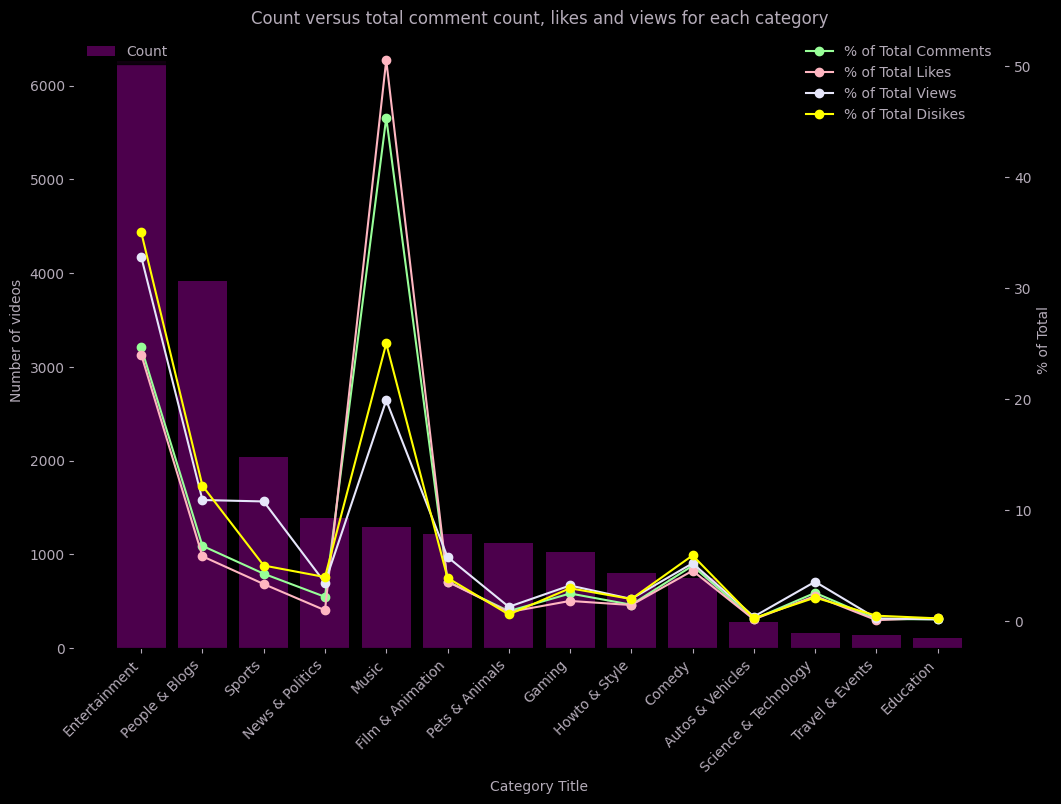

In [ ]:
#Number of vids versus views

colour_bars = colour_primary_purple#'cornflowerblue' #'#9e9e9e' #'#8ab6d6'
colour_comments = colour_complementary_mint_green#'#6a5acd' # '#34a853'
colour_likes= colour_complementary_soft_pink#'#ff7f50' # '#fbbc05'
colour_views =colour_accent_lavender #'#20b2aa' # '#ea4335'
# Create the first set of bars (count)
fig, ax1 = plt.subplots(figsize=(12, 8))



# Plot the count data on the primary y-axis (left)
ax1.bar(merged_df['category_title'], merged_df['count'], color=colour_bars, alpha=0.6, label='Count')
ax1.set_xlabel('Category Title')
ax1.set_ylabel('Number of videos')
# Set the rotation for the x-axis labels before creating any bar plots
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()


# Plot the % of total comment count data on the secondary y-axis (right)
ax2.plot(merged_df['category_title'], merged_df['%_of_total_comments'], color=colour_comments, marker='o', label='% of Total Comments')

# Plot the likes data on the secondary y-axis (right)
ax2.plot(merged_df['category_title'], merged_df['%_of_total_likes'], color=colour_likes, marker='o', label='% of Total Likes')

# Plot the views data on the secondary y-axis (right)
ax2.plot(merged_df['category_title'], merged_df['%_of_total_views'], color=colour_views, marker='o', label='% of Total Views')

# Plot the dislikes data on the secondary y-axis (right)
ax2.plot(merged_df['category_title'], merged_df['%_of_total_dislikes'], color='yellow', marker='o', label='% of Total Disikes')

ax2.set_ylabel('% of Total')

# Since we've added more datasets to ax2, it's best to collect all the legend handles and labels, and then display them together.
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

# Add legend for all datasets
ax1.legend(handles1, labels1, loc='upper left')
ax2.legend(handles2, labels2, loc='upper right')

# Set a title for the graph
ax1.set_title('Count versus total comment count, likes and views for each category')

# Show the plot
plt.show()

In [ ]:
videos['month_year'] = videos['trending_date'].apply(lambda x: f"{x[0:2]}-{x[6:]}")
month_year = videos.groupby(['month_year'],as_index=False)['category_title'].value_counts().reset_index().sort_index()
month_year = month_year.rename(columns={'category_title':'Category Title'})


# Pivot data to get category counts per month
pivot_df = month_year.pivot(index='month_year', columns='Category Title', values='count').fillna(0)

# Calculate percentage contribution of each category per month
pivot_df_percentage = pivot_df.divide(pivot_df.sum(axis=1), axis=0) * 100

# Melt the dataframe to long format for plotting with Plotly
df_melted = pivot_df_percentage.reset_index().melt(id_vars='month_year', value_name='percentage')


# Create an interactive filled line graph
fig = px.area(df_melted, x='month_year', y='percentage', color='Category Title',
              title='Percentage Contribution of Each Category Type per Month',
              labels={'month_year': 'Month of Year', 'percentage': 'Percentage Contribution'},
              hover_data=['Category Title', 'percentage'],
              line_shape='linear')

fig.update_layout(
    width=900, height=600, margin=dict(l=40, r=40, b=40, t=40),
    title_font_color = colour_off_white,
    xaxis_title_font_color = colour_off_white,
    yaxis=dict(showgrid=False),
    xaxis=dict(linecolor=colour_primary_black,showgrid=False),
    yaxis_title_font_color = colour_off_white,
    font_color= colour_off_white,
    plot_bgcolor=colour_primary_black,
    paper_bgcolor = colour_primary_black,
)

# Show the plot
fig.show()


## South Korea

In [ ]:
# manually open and read the JSON file
with open('/Users/<USERID>/Desktop/Data/1718/KR_category_id.json', 'r') as json_file:
    category_id = json.load(json_file)

##manually read in the csv file
videos = pd.read_csv('/Users/<USERID>/Desktop/Data/1718/KRvideos.csv', encoding="ISO-8859-1")

###using category titles from json

json_df = pd.DataFrame(category_id['items'])
# Convert 'id' column to int64
json_df['id'] = json_df['id'].astype('int64')


# Extract 'title' from 'snippet' and assign it a name
json_df['category_title'] = json_df['snippet'].apply(lambda x: x['title'])

# Merge the DataFrames with the 'title' column
videos = videos.merge(json_df[['id', 'category_title']], left_on='category_id', right_on='id')

# Drop the 'id' column from the merged DataFrame
videos = videos.drop(columns=['id'])

##creating table to create bargraphs from

# Count occurrences of each unique value
value_counts = videos['category_title'].value_counts()

#summing the total views
category_views = videos.groupby(['category_title'],as_index=False)['views'].sum()

## summing up total comment_count
category_comment_count = videos.groupby(['category_title'],as_index=False)['comment_count'].sum()

##summing the total likes
category_likes = videos.groupby(['category_title'],as_index=False)['likes'].sum()
##summing the total likes
category_dislikes = videos.groupby(['category_title'],as_index=False)['dislikes'].sum()

# Sort the results
sorted_counts = value_counts.sort_values(ascending=False)
bargraph_data = pd.DataFrame({'category_title': sorted_counts.index, 'count': sorted_counts.values})
merged_df = bargraph_data.merge(category_views, on='category_title', how='left').merge(category_likes,on='category_title', how='left').merge(category_dislikes, on='category_title', how='left').merge(category_comment_count, on='category_title', how='left')

merged_df['%_of_total_views'] = ((merged_df['views']/merged_df['views'].sum()) * 100).round(2)
merged_df['%_of_total_likes'] = ((merged_df['likes']/merged_df['likes'].sum()) * 100).round(2)
merged_df['%_of_total_dislikes'] = ((merged_df['dislikes']/merged_df['dislikes'].sum()) * 100).round(2)
merged_df['%_of_total_comments'] = ((merged_df['comment_count']/merged_df['comment_count'].sum()) * 100).round(2)

column_sum = merged_df['count'].sum()
merged_df['%_of_videos'] = ((merged_df['count']/column_sum) * 100).round(2)


merged_df

,category_title,count,views,likes,dislikes,comment_count,%_of_total_views,%_of_total_likes,%_of_total_dislikes,%_of_total_comments,%_of_videos
0,Entertainment,8955,4570464883,88234195,7861813,17324199,31.15,20.96,42.24,24.78,26.12
1,News & Politics,7582,1172764863,13911965,1234553,4162688,7.99,3.30,6.63,5.95,22.12
2,People & Blogs,7056,1480367763,21330185,998648,4225475,10.09,5.07,5.37,6.04,20.58
3,Film & Animation,2200,1196833781,16492926,629643,2737433,8.16,3.92,3.38,3.91,6.42
4,Comedy,2056,739841742,13110818,534884,3028270,5.04,3.11,2.87,4.33,6.00
5,Music,1825,3796991831,240239454,6311717,30550411,25.88,57.07,33.91,43.69,5.32
6,Gaming,1392,391767850,9787109,327335,4779081,2.67,2.32,1.76,6.83,4.06
7,Sports,936,560430327,4194891,221186,911487,3.82,1.00,1.19,1.30,2.73
8,Pets & Animals,735,148637896,3244565,51874,537891,1.01,0.77,0.28,0.77,2.14
9,Howto & Style,558,175556596,3613894,126951,377868,1.20,0.86,0.68,0.54,1.63


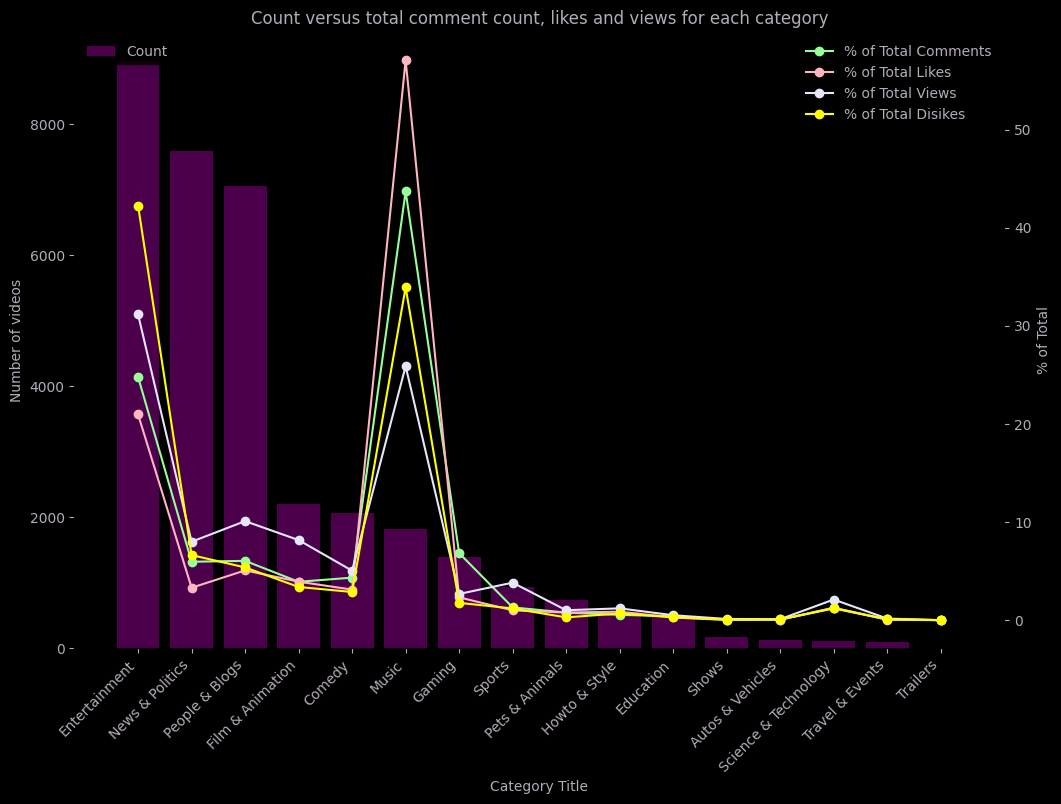

In [ ]:
#Number of vids versus views

colour_bars = colour_primary_purple#'cornflowerblue' #'#9e9e9e' #'#8ab6d6'
colour_comments = colour_complementary_mint_green#'#6a5acd' # '#34a853'
colour_likes= colour_complementary_soft_pink#'#ff7f50' # '#fbbc05'
colour_views =colour_accent_lavender #'#20b2aa' # '#ea4335'
# Create the first set of bars (count)
fig, ax1 = plt.subplots(figsize=(12, 8))



# Plot the count data on the primary y-axis (left)
ax1.bar(merged_df['category_title'], merged_df['count'], color=colour_bars, alpha=0.6, label='Count')
ax1.set_xlabel('Category Title')
ax1.set_ylabel('Number of videos')
# Set the rotation for the x-axis labels before creating any bar plots
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()


# Plot the % of total comment count data on the secondary y-axis (right)
ax2.plot(merged_df['category_title'], merged_df['%_of_total_comments'], color=colour_comments, marker='o', label='% of Total Comments')

# Plot the likes data on the secondary y-axis (right)
ax2.plot(merged_df['category_title'], merged_df['%_of_total_likes'], color=colour_likes, marker='o', label='% of Total Likes')

# Plot the views data on the secondary y-axis (right)
ax2.plot(merged_df['category_title'], merged_df['%_of_total_views'], color=colour_views, marker='o', label='% of Total Views')

# Plot the dislikes data on the secondary y-axis (right)
ax2.plot(merged_df['category_title'], merged_df['%_of_total_dislikes'], color='yellow', marker='o', label='% of Total Disikes')

ax2.set_ylabel('% of Total')

# Since we've added more datasets to ax2, it's best to collect all the legend handles and labels, and then display them together.
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

# Add legend for all datasets
ax1.legend(handles1, labels1, loc='upper left')
ax2.legend(handles2, labels2, loc='upper right')

# Set a title for the graph
ax1.set_title('Count versus total comment count, likes and views for each category')

# Show the plot
plt.show()

In [ ]:
videos['month_year'] = videos['trending_date'].apply(lambda x: f"{x[0:2]}-{x[6:]}")
month_year = videos.groupby(['month_year'],as_index=False)['category_title'].value_counts().reset_index().sort_index()
month_year = month_year.rename(columns={'category_title':'Category Title'})


# Pivot data to get category counts per month
pivot_df = month_year.pivot(index='month_year', columns='Category Title', values='count').fillna(0)

# Calculate percentage contribution of each category per month
pivot_df_percentage = pivot_df.divide(pivot_df.sum(axis=1), axis=0) * 100

# Melt the dataframe to long format for plotting with Plotly
df_melted = pivot_df_percentage.reset_index().melt(id_vars='month_year', value_name='percentage')


# Create an interactive filled line graph
fig = px.area(df_melted, x='month_year', y='percentage', color='Category Title',
              title='Percentage Contribution of Each Category Type per Month',
              labels={'month_year': 'Month of Year', 'percentage': 'Percentage Contribution'},
              hover_data=['Category Title', 'percentage'],
              line_shape='linear')

fig.update_layout(
    width=900, height=600, margin=dict(l=40, r=40, b=40, t=40),
    title_font_color = colour_off_white,
    xaxis_title_font_color = colour_off_white,
    yaxis=dict(showgrid=False),
    xaxis=dict(linecolor=colour_primary_black,showgrid=False),
    yaxis_title_font_color = colour_off_white,
    font_color= colour_off_white,
    plot_bgcolor=colour_primary_black,
    paper_bgcolor = colour_primary_black,
)

# Show the plot
fig.show()


## Mexico

In [ ]:
# manually open and read the JSON file
with open('/Users/<USERID>/Desktop/Data/1718/MX_category_id.json', 'r') as json_file:
    category_id = json.load(json_file)

##manually read in the csv file
videos = pd.read_csv('/Users/<USERID>/Desktop/Data/1718/MXvideos.csv', encoding="ISO-8859-1")

###using category titles from json

json_df = pd.DataFrame(category_id['items'])
# Convert 'id' column to int64
json_df['id'] = json_df['id'].astype('int64')


# Extract 'title' from 'snippet' and assign it a name
json_df['category_title'] = json_df['snippet'].apply(lambda x: x['title'])

# Merge the DataFrames with the 'title' column
videos = videos.merge(json_df[['id', 'category_title']], left_on='category_id', right_on='id')

# Drop the 'id' column from the merged DataFrame
videos = videos.drop(columns=['id'])

##creating table to create bargraphs from

# Count occurrences of each unique value
value_counts = videos['category_title'].value_counts()

#summing the total views
category_views = videos.groupby(['category_title'],as_index=False)['views'].sum()

## summing up total comment_count
category_comment_count = videos.groupby(['category_title'],as_index=False)['comment_count'].sum()

##summing the total likes
category_likes = videos.groupby(['category_title'],as_index=False)['likes'].sum()
##summing the total likes
category_dislikes = videos.groupby(['category_title'],as_index=False)['dislikes'].sum()

# Sort the results
sorted_counts = value_counts.sort_values(ascending=False)
bargraph_data = pd.DataFrame({'category_title': sorted_counts.index, 'count': sorted_counts.values})
merged_df = bargraph_data.merge(category_views, on='category_title', how='left').merge(category_likes,on='category_title', how='left').merge(category_dislikes, on='category_title', how='left').merge(category_comment_count, on='category_title', how='left')

merged_df['%_of_total_views'] = ((merged_df['views']/merged_df['views'].sum()) * 100).round(2)
merged_df['%_of_total_likes'] = ((merged_df['likes']/merged_df['likes'].sum()) * 100).round(2)
merged_df['%_of_total_dislikes'] = ((merged_df['dislikes']/merged_df['dislikes'].sum()) * 100).round(2)
merged_df['%_of_total_comments'] = ((merged_df['comment_count']/merged_df['comment_count'].sum()) * 100).round(2)

column_sum = merged_df['count'].sum()
merged_df['%_of_videos'] = ((merged_df['count']/column_sum) * 100).round(2)


merged_df

,category_title,count,views,likes,dislikes,comment_count,%_of_total_views,%_of_total_likes,%_of_total_dislikes,%_of_total_comments,%_of_videos
0,Entertainment,13487,4027574336,186692595,11139060,29688886,29.19,29.23,37.48,36.41,33.55
1,People & Blogs,8159,1229501908,47859054,3219558,7304854,8.91,7.49,10.83,8.96,20.30
2,Sports,4050,1389337978,30866251,1279451,3206096,10.07,4.83,4.31,3.93,10.07
3,Music,3371,4159713283,227013300,7957335,21744565,30.15,35.54,26.78,26.67,8.39
4,News & Politics,3113,491449042,11910414,957379,2328675,3.56,1.86,3.22,2.86,7.74
5,Howto & Style,2467,465587429,24651100,792362,3682138,3.37,3.86,2.67,4.52,6.14
6,Comedy,1742,794647488,55273506,2400688,6838587,5.76,8.65,8.08,8.39,4.33
7,Film & Animation,1298,461919619,17915248,516653,2048173,3.35,2.80,1.74,2.51,3.23
8,Gaming,994,421961773,24002503,938239,2887305,3.06,3.76,3.16,3.54,2.47
9,Education,532,43205309,2550632,67408,295654,0.31,0.40,0.23,0.36,1.32


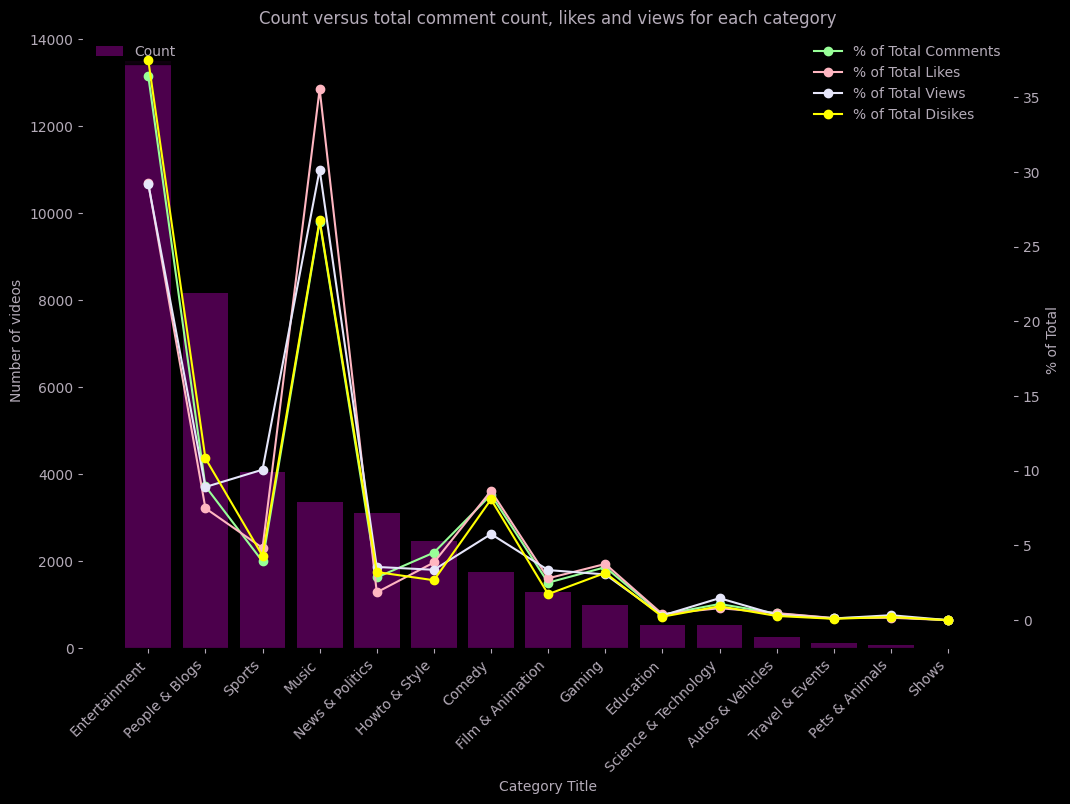

In [ ]:
#Number of vids versus views

colour_bars = colour_primary_purple#'cornflowerblue' #'#9e9e9e' #'#8ab6d6'
colour_comments = colour_complementary_mint_green#'#6a5acd' # '#34a853'
colour_likes= colour_complementary_soft_pink#'#ff7f50' # '#fbbc05'
colour_views =colour_accent_lavender #'#20b2aa' # '#ea4335'
# Create the first set of bars (count)
fig, ax1 = plt.subplots(figsize=(12, 8))



# Plot the count data on the primary y-axis (left)
ax1.bar(merged_df['category_title'], merged_df['count'], color=colour_bars, alpha=0.6, label='Count')
ax1.set_xlabel('Category Title')
ax1.set_ylabel('Number of videos')
# Set the rotation for the x-axis labels before creating any bar plots
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()


# Plot the % of total comment count data on the secondary y-axis (right)
ax2.plot(merged_df['category_title'], merged_df['%_of_total_comments'], color=colour_comments, marker='o', label='% of Total Comments')

# Plot the likes data on the secondary y-axis (right)
ax2.plot(merged_df['category_title'], merged_df['%_of_total_likes'], color=colour_likes, marker='o', label='% of Total Likes')

# Plot the views data on the secondary y-axis (right)
ax2.plot(merged_df['category_title'], merged_df['%_of_total_views'], color=colour_views, marker='o', label='% of Total Views')

# Plot the dislikes data on the secondary y-axis (right)
ax2.plot(merged_df['category_title'], merged_df['%_of_total_dislikes'], color='yellow', marker='o', label='% of Total Disikes')

ax2.set_ylabel('% of Total')

# Since we've added more datasets to ax2, it's best to collect all the legend handles and labels, and then display them together.
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

# Add legend for all datasets
ax1.legend(handles1, labels1, loc='upper left')
ax2.legend(handles2, labels2, loc='upper right')

# Set a title for the graph
ax1.set_title('Count versus total comment count, likes and views for each category')

# Show the plot
plt.show()

In [ ]:
videos['month_year'] = videos['trending_date'].apply(lambda x: f"{x[0:2]}-{x[6:]}")
month_year = videos.groupby(['month_year'],as_index=False)['category_title'].value_counts().reset_index().sort_index()
month_year = month_year.rename(columns={'category_title':'Category Title'})


# Pivot data to get category counts per month
pivot_df = month_year.pivot(index='month_year', columns='Category Title', values='count').fillna(0)

# Calculate percentage contribution of each category per month
pivot_df_percentage = pivot_df.divide(pivot_df.sum(axis=1), axis=0) * 100

# Melt the dataframe to long format for plotting with Plotly
df_melted = pivot_df_percentage.reset_index().melt(id_vars='month_year', value_name='percentage')


# Create an interactive filled line graph
fig = px.area(df_melted, x='month_year', y='percentage', color='Category Title',
              title='Percentage Contribution of Each Category Type per Month',
              labels={'month_year': 'Month of Year', 'percentage': 'Percentage Contribution'},
              hover_data=['Category Title', 'percentage'],
              line_shape='linear')

fig.update_layout(
    width=900, height=600, margin=dict(l=40, r=40, b=40, t=40),
    title_font_color = colour_off_white,
    xaxis_title_font_color = colour_off_white,
    yaxis=dict(showgrid=False),
    xaxis=dict(linecolor=colour_primary_black,showgrid=False),
    yaxis_title_font_color = colour_off_white,
    font_color= colour_off_white,
    plot_bgcolor=colour_primary_black,
    paper_bgcolor = colour_primary_black,
)

# Show the plot
fig.show()


## Russia

In [ ]:
# manually open and read the JSON file
with open('/Users/<USERID>/Desktop/Data/1718/RU_category_id.json', 'r') as json_file:
    category_id = json.load(json_file)

##manually read in the csv file
videos = pd.read_csv('/Users/<USERID>/Desktop/Data/1718/RUvideos.csv', encoding="ISO-8859-1")

###using category titles from json

json_df = pd.DataFrame(category_id['items'])
# Convert 'id' column to int64
json_df['id'] = json_df['id'].astype('int64')


# Extract 'title' from 'snippet' and assign it a name
json_df['category_title'] = json_df['snippet'].apply(lambda x: x['title'])

# Merge the DataFrames with the 'title' column
videos = videos.merge(json_df[['id', 'category_title']], left_on='category_id', right_on='id')

# Drop the 'id' column from the merged DataFrame
videos = videos.drop(columns=['id'])

##creating table to create bargraphs from

# Count occurrences of each unique value
value_counts = videos['category_title'].value_counts()

#summing the total views
category_views = videos.groupby(['category_title'],as_index=False)['views'].sum()

## summing up total comment_count
category_comment_count = videos.groupby(['category_title'],as_index=False)['comment_count'].sum()

##summing the total likes
category_likes = videos.groupby(['category_title'],as_index=False)['likes'].sum()
##summing the total likes
category_dislikes = videos.groupby(['category_title'],as_index=False)['dislikes'].sum()

# Sort the results
sorted_counts = value_counts.sort_values(ascending=False)
bargraph_data = pd.DataFrame({'category_title': sorted_counts.index, 'count': sorted_counts.values})
merged_df = bargraph_data.merge(category_views, on='category_title', how='left').merge(category_likes,on='category_title', how='left').merge(category_dislikes, on='category_title', how='left').merge(category_comment_count, on='category_title', how='left')

merged_df['%_of_total_views'] = ((merged_df['views']/merged_df['views'].sum()) * 100).round(2)
merged_df['%_of_total_likes'] = ((merged_df['likes']/merged_df['likes'].sum()) * 100).round(2)
merged_df['%_of_total_dislikes'] = ((merged_df['dislikes']/merged_df['dislikes'].sum()) * 100).round(2)
merged_df['%_of_total_comments'] = ((merged_df['comment_count']/merged_df['comment_count'].sum()) * 100).round(2)

column_sum = merged_df['count'].sum()
merged_df['%_of_videos'] = ((merged_df['count']/column_sum) * 100).round(2)


merged_df

,category_title,count,views,likes,dislikes,comment_count,%_of_total_views,%_of_total_likes,%_of_total_dislikes,%_of_total_comments,%_of_videos
0,People & Blogs,10350,1564739895,73222107,11792144,11694645,16.44,15.05,22.56,17.22,26.40
1,Entertainment,5943,2088743148,98904908,9479944,14324340,21.94,20.33,18.13,21.09,15.16
2,News & Politics,5402,739248272,15274142,9178532,4724537,7.76,3.14,17.56,6.96,13.78
3,Comedy,3065,1021361186,69987601,7156751,8269629,10.73,14.38,13.69,12.17,7.82
4,Film & Animation,3041,540227680,19150169,1185665,2138455,5.67,3.94,2.27,3.15,7.76
5,Howto & Style,2000,386912627,12708499,632259,1613128,4.06,2.61,1.21,2.37,5.10
6,Sports,1968,383133314,11466103,706483,1405578,4.02,2.36,1.35,2.07,5.02
7,Music,1895,1605269644,120129951,8069397,13197717,16.86,24.69,15.43,19.43,4.83
8,Autos & Vehicles,1583,383781815,21223727,1473827,2245794,4.03,4.36,2.82,3.31,4.04
9,Science & Technology,1133,425486169,25866814,1435933,5700658,4.47,5.32,2.75,8.39,2.89


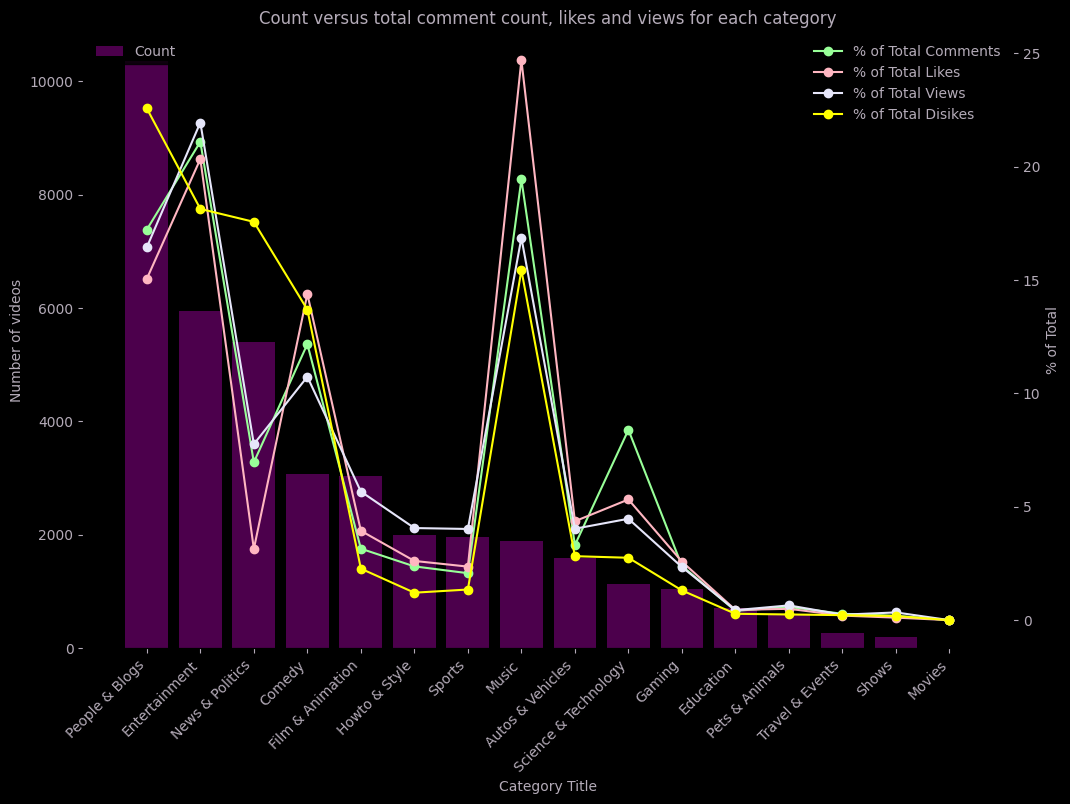

In [ ]:
#Number of vids versus views

colour_bars = colour_primary_purple#'cornflowerblue' #'#9e9e9e' #'#8ab6d6'
colour_comments = colour_complementary_mint_green#'#6a5acd' # '#34a853'
colour_likes= colour_complementary_soft_pink#'#ff7f50' # '#fbbc05'
colour_views =colour_accent_lavender #'#20b2aa' # '#ea4335'
# Create the first set of bars (count)
fig, ax1 = plt.subplots(figsize=(12, 8))



# Plot the count data on the primary y-axis (left)
ax1.bar(merged_df['category_title'], merged_df['count'], color=colour_bars, alpha=0.6, label='Count')
ax1.set_xlabel('Category Title')
ax1.set_ylabel('Number of videos')
# Set the rotation for the x-axis labels before creating any bar plots
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()


# Plot the % of total comment count data on the secondary y-axis (right)
ax2.plot(merged_df['category_title'], merged_df['%_of_total_comments'], color=colour_comments, marker='o', label='% of Total Comments')

# Plot the likes data on the secondary y-axis (right)
ax2.plot(merged_df['category_title'], merged_df['%_of_total_likes'], color=colour_likes, marker='o', label='% of Total Likes')

# Plot the views data on the secondary y-axis (right)
ax2.plot(merged_df['category_title'], merged_df['%_of_total_views'], color=colour_views, marker='o', label='% of Total Views')

# Plot the dislikes data on the secondary y-axis (right)
ax2.plot(merged_df['category_title'], merged_df['%_of_total_dislikes'], color='yellow', marker='o', label='% of Total Disikes')

ax2.set_ylabel('% of Total')

# Since we've added more datasets to ax2, it's best to collect all the legend handles and labels, and then display them together.
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

# Add legend for all datasets
ax1.legend(handles1, labels1, loc='upper left')
ax2.legend(handles2, labels2, loc='upper right')

# Set a title for the graph
ax1.set_title('Count versus total comment count, likes and views for each category')

# Show the plot
plt.show()

In [ ]:
videos['month_year'] = videos['trending_date'].apply(lambda x: f"{x[0:2]}-{x[6:]}")
month_year = videos.groupby(['month_year'],as_index=False)['category_title'].value_counts().reset_index().sort_index()
month_year = month_year.rename(columns={'category_title':'Category Title'})


# Pivot data to get category counts per month
pivot_df = month_year.pivot(index='month_year', columns='Category Title', values='count').fillna(0)

# Calculate percentage contribution of each category per month
pivot_df_percentage = pivot_df.divide(pivot_df.sum(axis=1), axis=0) * 100

# Melt the dataframe to long format for plotting with Plotly
df_melted = pivot_df_percentage.reset_index().melt(id_vars='month_year', value_name='percentage')


# Create an interactive filled line graph
fig = px.area(df_melted, x='month_year', y='percentage', color='Category Title',
              title='Percentage Contribution of Each Category Type per Month',
              labels={'month_year': 'Month of Year', 'percentage': 'Percentage Contribution'},
              hover_data=['Category Title', 'percentage'],
              line_shape='linear')

fig.update_layout(
    width=900, height=600, margin=dict(l=40, r=40, b=40, t=40),
    title_font_color = colour_off_white,
    xaxis_title_font_color = colour_off_white,
    yaxis=dict(showgrid=False),
    xaxis=dict(linecolor=colour_primary_black,showgrid=False),
    yaxis_title_font_color = colour_off_white,
    font_color= colour_off_white,
    plot_bgcolor=colour_primary_black,
    paper_bgcolor = colour_primary_black,
)

# Show the plot
fig.show()


## USA

In [ ]:
# manually open and read the JSON file
with open('/Users/<USERID>/Desktop/Data/1718/US_category_id.json', 'r') as json_file:
    category_id = json.load(json_file)

##manually read in the csv file
videos = pd.read_csv('/Users/<USERID>/Desktop/Data/1718/USvideos.csv')

###using category titles from json

json_df = pd.DataFrame(category_id['items'])
# Convert 'id' column to int64
json_df['id'] = json_df['id'].astype('int64')


# Extract 'title' from 'snippet' and assign it a name
json_df['category_title'] = json_df['snippet'].apply(lambda x: x['title'])

# Merge the DataFrames with the 'title' column
videos = videos.merge(json_df[['id', 'category_title']], left_on='category_id', right_on='id')

# Drop the 'id' column from the merged DataFrame
videos = videos.drop(columns=['id'])

##creating table to create bargraphs from

# Count occurrences of each unique value
value_counts = videos['category_title'].value_counts()

#summing the total views
category_views = videos.groupby(['category_title'],as_index=False)['views'].sum()

## summing up total comment_count
category_comment_count = videos.groupby(['category_title'],as_index=False)['comment_count'].sum()

##summing the total likes
category_likes = videos.groupby(['category_title'],as_index=False)['likes'].sum()
##summing the total likes
category_dislikes = videos.groupby(['category_title'],as_index=False)['dislikes'].sum()

# Sort the results
sorted_counts = value_counts.sort_values(ascending=False)
bargraph_data = pd.DataFrame({'category_title': sorted_counts.index, 'count': sorted_counts.values})
merged_df = bargraph_data.merge(category_views, on='category_title', how='left').merge(category_likes,on='category_title', how='left').merge(category_dislikes, on='category_title', how='left').merge(category_comment_count, on='category_title', how='left')

merged_df['%_of_total_views'] = ((merged_df['views']/merged_df['views'].sum()) * 100).round(2)
merged_df['%_of_total_likes'] = ((merged_df['likes']/merged_df['likes'].sum()) * 100).round(2)
merged_df['%_of_total_dislikes'] = ((merged_df['dislikes']/merged_df['dislikes'].sum()) * 100).round(2)
merged_df['%_of_total_comments'] = ((merged_df['comment_count']/merged_df['comment_count'].sum()) * 100).round(2)

column_sum = merged_df['count'].sum()
merged_df['%_of_videos'] = ((merged_df['count']/column_sum) * 100).round(2)


merged_df

,category_title,count,views,likes,dislikes,comment_count,%_of_total_views,%_of_total_likes,%_of_total_dislikes,%_of_total_comments,%_of_videos
0,Entertainment,9964,20604388195,530516491,42987663,73566498,21.31,17.44,28.29,21.27,24.33
1,Music,6472,40132892190,1416838584,51179008,125296396,41.51,46.59,33.68,36.22,15.81
2,Howto & Style,4146,4078545064,162880075,5473899,23149550,4.22,5.36,3.60,6.69,10.12
3,Comedy,3457,5117426208,216346746,7230391,22545582,5.29,7.11,4.76,6.52,8.44
4,People & Blogs,3210,4917191726,186615999,10187901,24778032,5.09,6.14,6.70,7.16,7.84
5,News & Politics,2487,1473765704,18151033,4180049,6039433,1.52,0.60,2.75,1.75,6.07
6,Science & Technology,2401,3487756816,82532638,4548402,11989926,3.61,2.71,2.99,3.47,5.86
7,Film & Animation,2345,7284156721,165997476,6075148,17887060,7.53,5.46,4.00,5.17,5.73
8,Sports,2174,4404456673,98621211,5133551,11192155,4.56,3.24,3.38,3.24,5.31
9,Education,1656,1180629990,49257772,1351972,5442242,1.22,1.62,0.89,1.57,4.04


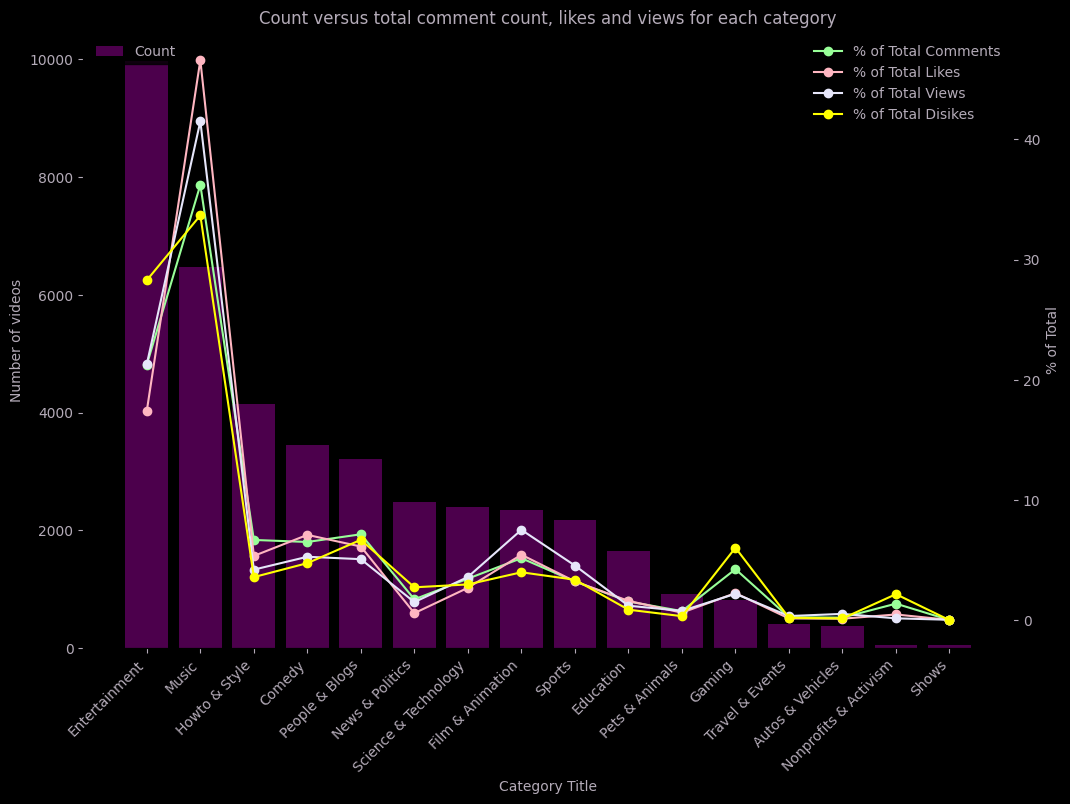

In [ ]:
#Number of vids versus views

colour_bars = colour_primary_purple#'cornflowerblue' #'#9e9e9e' #'#8ab6d6'
colour_comments = colour_complementary_mint_green#'#6a5acd' # '#34a853'
colour_likes= colour_complementary_soft_pink#'#ff7f50' # '#fbbc05'
colour_views =colour_accent_lavender #'#20b2aa' # '#ea4335'
# Create the first set of bars (count)
fig, ax1 = plt.subplots(figsize=(12, 8))



# Plot the count data on the primary y-axis (left)
ax1.bar(merged_df['category_title'], merged_df['count'], color=colour_bars, alpha=0.6, label='Count')
ax1.set_xlabel('Category Title')
ax1.set_ylabel('Number of videos')
# Set the rotation for the x-axis labels before creating any bar plots
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()


# Plot the % of total comment count data on the secondary y-axis (right)
ax2.plot(merged_df['category_title'], merged_df['%_of_total_comments'], color=colour_comments, marker='o', label='% of Total Comments')

# Plot the likes data on the secondary y-axis (right)
ax2.plot(merged_df['category_title'], merged_df['%_of_total_likes'], color=colour_likes, marker='o', label='% of Total Likes')

# Plot the views data on the secondary y-axis (right)
ax2.plot(merged_df['category_title'], merged_df['%_of_total_views'], color=colour_views, marker='o', label='% of Total Views')

# Plot the dislikes data on the secondary y-axis (right)
ax2.plot(merged_df['category_title'], merged_df['%_of_total_dislikes'], color='yellow', marker='o', label='% of Total Disikes')

ax2.set_ylabel('% of Total')

# Since we've added more datasets to ax2, it's best to collect all the legend handles and labels, and then display them together.
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

# Add legend for all datasets
ax1.legend(handles1, labels1, loc='upper left')
ax2.legend(handles2, labels2, loc='upper right')

# Set a title for the graph
ax1.set_title('Count versus total comment count, likes and views for each category')

# Show the plot
plt.show()

In [ ]:
videos['month_year'] = videos['trending_date'].apply(lambda x: f"{x[0:2]}-{x[6:]}")
month_year = videos.groupby(['month_year'],as_index=False)['category_title'].value_counts().reset_index().sort_index()
month_year = month_year.rename(columns={'category_title':'Category Title'})


# Pivot data to get category counts per month
pivot_df = month_year.pivot(index='month_year', columns='Category Title', values='count').fillna(0)

# Calculate percentage contribution of each category per month
pivot_df_percentage = pivot_df.divide(pivot_df.sum(axis=1), axis=0) * 100

# Melt the dataframe to long format for plotting with Plotly
df_melted = pivot_df_percentage.reset_index().melt(id_vars='month_year', value_name='percentage')


# Create an interactive filled line graph
fig = px.area(df_melted, x='month_year', y='percentage', color='Category Title',
              title='Percentage Contribution of Each Category Type per Month',
              labels={'month_year': 'Month of Year', 'percentage': 'Percentage Contribution'},
              hover_data=['Category Title', 'percentage'],
              line_shape='linear')

fig.update_layout(
    width=900, height=600, margin=dict(l=40, r=40, b=40, t=40),
    title_font_color = colour_off_white,
    xaxis_title_font_color = colour_off_white,
    yaxis=dict(showgrid=False),
    xaxis=dict(linecolor=colour_primary_black,showgrid=False),
    yaxis_title_font_color = colour_off_white,
    font_color= colour_off_white,
    plot_bgcolor=colour_primary_black,
    paper_bgcolor = colour_primary_black,
)

# Show the plot
fig.show()
